# Scenariusz alpha testów aplikacji [MLOps](https://github.com/mlops-ai/mlops)

**Witaj użytkowniku!** Na wstępie serdecznie dziękujemy za chęć udziału w alpha testach, a co za tym idzie wsparciu naszej aplikacji. <br><br>
W poniższych komórkach znajdziesz polecenia, które należy wykonać. Po każdym poleceniu jest pusta komórka na (jeśli jest taka potrzeba) kod po stronie biblioteki oraz kolejna komórka na komentarz odnośnie tego jak oceniasz łatwość wykonania polecenia, ewentualne uwagi oraz wskazówki. :) 

## 0. Setup środowiska

### 0.1 Instalacja aplikacji oraz bilbioteki

Aby uruchomić aplikację lokalnie, pobierz nasze repepozytorium z [GitHuba](https://github.com/mlops-ai/mlops), a następnie w celu instalacji postępuj zgodnie z krokami wymienionymi w sekcji [Installation & usage](https://github.com/mlops-ai/mlops#installation--usage).

### <font color='red'>UWAGA! </font> 
Upewnij się, że włącznie z biblioteką zainstalowały Ci się wersje bibliotek `scikit-learn==1.3.0` oraz `torch==2.1.1`. Jest to kluczowe w kontekście monitorowanych modeli, aby zachować te same wersje między biliboteką, a serwerem aplikacji.

In [1]:
# pip install mlops-ai

In [210]:
# pip show mlops-ai

In [16]:
# !pipenv install json2html

### 0.2 Dokumentacja

Szczegółową dokumentacje biblioteki aplikacji możesz znaleźć **TODO: LINK**. Jeśli jednak tak jak my, nie jesteś fanem czytania szczegółowej dokumentacji, przygotowaliśmy także przykładowe notebooki prezentujące kluczowe funkcjonalności aplikacji, które możesz znaleźć wewnątrz folderu `library/tests/notebooks`

## 1. Moduł tworzenia

### 1.1 Tworzenie projektu po stronie biblioteki

Utwórz pusty projekt wykorzystując odpowiednie funkcje po stronie biblioteki

In [4]:
from mlops.tracking import create_project

In [6]:
project = create_project("My First MLOps Project")

In [9]:
project

{'_id': '657b13c2d660d369e83e6acc',
 'title': 'My First MLOps Project',
 'description': None,
 'status': 'not_started',
 'archived': False,
 'created_at': '2023-12-14T15:40:02.635196',
 'updated_at': '2023-12-14T15:40:02.635212',
 'experiments': [],
 'pinned': False}

**Komentarz**:

### 1.2 Usuwanie oraz tworzenie projektu po stronie aplikacji webowej

Usuń wcześniej utworzony projekt po stronie aplikacji webowej oraz utwórz analogiczny projekt tym razem z aplikacji webowej.

**Komentarz:**

### 1.3 Tworzenie eksperymentu

Po stronie biblioteki utwórzy przykładowy eksperyment o nazwie *Initial modeling*.

In [12]:
from mlops.tracking import create_experiment

In [11]:
id = "657b16c7d660d369e83e6acd"  # copied from web interface

In [13]:
exp = create_experiment("Initial modeling", project_id=id)

In [14]:
exp

{'id': '657b187bd660d369e83e6ace',
 'project_id': '657b16c7d660d369e83e6acd',
 'name': 'Initial modeling',
 'description': None,
 'created_at': '2023-12-14T16:00:11.077519',
 'updated_at': '2023-12-14T16:00:11.077532',
 'iterations': []}

**Komentarz:**

### 1.4 Ustawienie projektu oraz eksperymentu jako aktywne

Ustaw uprzednio utworzony projekt oraz eksperyment jako aktywny projekt/aktywny eksperyment. <br> Dzięki temu, za każdym razem kiedy będziesz tworzył iteracje nie będziesz musiał się do nich odwoływać.

**Hint:** `set_active_project()`, `set_active_experiment()`

In [18]:
from mlops.tracking import get_project, set_active_project, set_active_experiment

In [19]:
project = get_project(id)

In [21]:
set_active_project(project["_id"])

'Active project set to: 657b16c7d660d369e83e6acd'

In [23]:
set_active_experiment(exp["id"])

'Active experiment set to: 657b187bd660d369e83e6ace'

**Komentarz:**

### 1.5 Utworzenie datasetu

Będziesz pracował na dobrze znanym zbiorze danych [Iris dataset]('https://raw.githubusercontent.com/TripathiAshutosh/dataset/main/iris.csv'). Utwórz dataset po stronie bilbioteki, podaj parametry takie jak link, tagi czy wersja. Alternatywnie, możesz go również stworzyć po stronie aplikacji webowej i zaciągnąć do biblioteki za pomocą odpowiedniej funkcji.

**TODO: DODAĆ GET DATASTET /name/version PO STRONIE SERWERA/BIBLIOTEKI**

In [24]:
from mlops.tracking import create_dataset

In [25]:
dataset = create_dataset(
    dataset_name="Iris dataset",
    path_to_dataset="https://raw.githubusercontent.com/TripathiAshutosh/dataset/main/iris.csv",
    dataset_description="Famous Iris species dataset",
    tags="iris,classification,multiclass",
    version="1.0"
)

In [26]:
dataset

{'_id': '657b2567d660d369e83e6acf',
 'dataset_name': 'Iris dataset',
 'path_to_dataset': 'https://raw.githubusercontent.com/TripathiAshutosh/dataset/main/iris.csv',
 'dataset_description': 'Famous Iris species dataset',
 'tags': 'iris,classification,multiclass',
 'archived': False,
 'created_at': '2023-12-14T16:55:19.799985',
 'updated_at': '2023-12-14T16:55:19.800135',
 'version': '1.0',
 'linked_iterations': {},
 'pinned': False}

**Komentarz:**

### 1.5 Utworzenie pierwszej iteracji

Przygotuj dane treningowe do utworzenia pierwszej iteracji (pomocny może się okazać poniższy kod).
```python
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

url = 'https://raw.githubusercontent.com/TripathiAshutosh/dataset/main/iris.csv'
df = pd.read_csv(filepath_or_buffer=url, sep=',')
y = LabelEncoder().fit_transform(df['class'])
X = df.drop(columns=['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify = y, random_state=42)
```

Następnie, wytrenuj model [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) z biblioteki scikit-learn. Zaloguj swoją pierwszą iteracje, logując informacje takie jak: 
- nazwa iteracji
- parametry 
- metryki na zbiorze testowym (accuracy, precision, recall, f1)
- odnośnik do datasetu

**TODO: FIX log_model_name**

In [193]:
import os
import pathlib
import pickle
from abc import abstractmethod

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from mlops.tracking import start_iteration

In [220]:
def load_mlops(dataset, **kwargs):
    path = dataset["path_to_dataset"]
    return pd.read_csv(path, **kwargs)


def iris_prep(dataset, test_size=0.5, target_col="class", random_state=None, **pd_kwargs):
    df = load_mlops(dataset, **pd_kwargs)
    X = df.drop(columns=[target_col])
    y = LabelEncoder().fit_transform(df[target_col])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)
    prep_dataset = {
        "train": [X_train, y_train],
        "test": [X_test, y_test]
    }
    return prep_dataset


class IterationRun:
    def __init__(self, dataset, prep, model_builder, model_params, model_path, mlops_iter, build_model=True):
        self.dataset = dataset
        self.prep = prep
        self.model = model_builder(**model_params) if build_model else None
        self.model_params = model_params
        self.model_path = model_path
        self.mlops_iter = mlops_iter
        self.prep_dataset = None
        self.metrics = None

        self._touch_model_file()

    def _got_valid_model_path(self):
        return self.model_path != "" and self.model_path is not None and isinstance(self.model_path, str)

    def _touch_model_file(self):
        if self._got_valid_model_path():
            path = pathlib.Path(self.model_path)
            path.parent.mkdir(parents=True, exist_ok=True)
            open(self.model_path, "a").close()
    
    @abstractmethod
    def train_model(self):
        return 
    
    def preprocess(self):
        self.prep_dataset = self.prep(self.dataset)

    def evaluate(self, average="binary"):
        X = self.prep_dataset["test"][0]
        y_true = self.prep_dataset["test"][1]
        y_pred = self.model.predict(X)
        test_metrics = {
            "accuracy": accuracy_score(y_true, y_pred),
            "precision": precision_score(y_true, y_pred, average=average),
            "recall": recall_score(y_true, y_pred, average=average),
            "f1": f1_score(y_true, y_pred, average=average)
        }
        self.metrics = test_metrics

    def get_confusion_matrix_display(self, set="test"):
        X = self.prep_dataset[set][0]
        y_true = self.prep_dataset[set][1]
        y_pred = self.model.predict(X)
        return ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

    def save_model(self):
        with open(self.model_path, "wb") as f:
            pickle.dump(self.model, f)

    def log(self):
        self.mlops_iter.log_parameters(parameters=self.model_params)
        self.mlops_iter.log_metrics(metrics=self.metrics)
        self.mlops_iter.log_dataset(dataset_id=self.dataset["_id"])
        # if self._got_valid_model_path():
        #     self.mlops_iter.log_path_to_model(path_to_model=self.model_path)


class ScikitIterationRun(IterationRun):
    def train_model(self):
        self.model.fit(*self.prep_dataset["train"])


In [146]:
model_builder = LogisticRegression
model_params = {"max_iter": 500}
model_path = ""

In [149]:
with start_iteration(iteration_name="Logit First Iteration") as iteration:
    run = ScikitIterationRun(dataset, iris_prep, model_builder, model_params, model_path, iteration)
    run.preprocess()
    run.train_model()
    run.evaluate(average="micro")
    run.log()


**Komentarz:**

### 1.6 Iteracje modeli KNN

Utwórz nowy eksperyment o nazwie *KNN models*. Wytrenuj 3-4 modele [KNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) każdy z nieco różnymi parametrami. Porównaj wyniki iteracji/eksperymentów zaznaczając je i klikając przycisk compare po stronie aplikacji webowej.

Dodatkowo, najlepszy z modeli zapisz lokalnie z wykorzystaniem biblioteki pickle oraz podczas logowania iteracji zaloguj jego ścieżkę (**ważne aby była to ścieżka absolutna, nie względna**).

**TODO: FIX MLOPS-268**

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
exp = create_experiment("KNN models")

In [82]:
set_active_experiment(exp["id"])

'Active experiment set to: 657b588ad660d369e83e6ad2'

In [205]:
model_builder = KNeighborsClassifier
model_params = {"n_neighbors": 3}

abspath = os.path.abspath(os.getcwd())
model_path_tmpl = os.path.join(abspath, "models/experiment={experiment}/iteration={iteration}/model.pkl")

iter_param_sets = [
    {"name": "KNN iter 1", "model_params": {"n_neighbors": 3}},
    {"name": "KNN iter 2", "model_params": {"n_neighbors": 5}},
    {"name": "KNN iter 3", "model_params": {"n_neighbors": 7}},
    {"name": "KNN iter 4", "model_params": {"n_neighbors": 21}},
]

In [206]:
for iter_params in iter_param_sets:
    with start_iteration(iteration_name=iter_params["name"]) as iteration:
        model_params = iter_params["model_params"]
        model_path = model_path_tmpl.format(experiment=iteration.experiment_id, iteration=iteration.iteration_name)
        model_path = model_path.replace(" ", "_")
        
        run = ScikitIterationRun(dataset, iris_prep, model_builder, model_params, model_path, iteration)
        run.preprocess()
        run.train_model()
        run.evaluate(average="micro")
        run.save_model()
        run.log()


**Komentarz:**
Tutaj mam mały problem, bo przy logowaniu ścieżki biblioteka sprawdza, czy jest pod nią faktycznie plik. Tylko, że chyba jest tam jakiś bug, bo nawet, gdy plik istnieje, zgłaszany jest wyjątek `FileNotFoundError`.

Nie wiem też, czy dobrze zrozumiałem tutaj zadanie, ale jeśli mam najpierw stworzyć iteracje, przejrzeć je w web appce i wybrać model, a dopiero potem zapisać i zalogować ścieżkę to widzę sprzeczność. Po zalogowaniu wszystkich porównywanych iteracji jestem już poza ich kontekstem (nawet dosłownie poza `context managerem`) więc nie mam jak ponownie dostać się do obiektu tej konkretnej iteracji, chyba że od początku użyję innej konstrukcji niż `context managera` (jednak tak widziałem, że najczęściej korzystacie z iteracji w przykładach).

Ostatecznie zrobiłem tak, jak robię najczęściej, czyli logowałem po prostu każdy model.

### 1.7 Logowanie wykresu Pythonowego

Utwórz osobny eksperyment o nazwie *Image charts*.
Następnie, utwórz dwa dowolne wykresy wykorzystując bibliotekę seaborn lub matplotlib (może być to np. wykres dot. zależności między cechami / predykcji). Następnie zapisz wykresy na dysku do formatu .png / .jpg i zaloguj je podczas dowolnej iteracji z wykorzysteniem, któregoś z wcześniej utworzonych modeli.

In [199]:
import matplotlib.pyplot as plt

In [180]:
exp = create_experiment("Image charts")

In [181]:
set_active_experiment(exp["id"])

'Active experiment set to: 657b71dad660d369e83e6af3'

In [202]:
def save_and_log_current_figure(path, mlops_iter):
    img_name = path.split("/")[-1].split(".")[0]
    plt.savefig(path)
    mlops_iter.log_image_chart(img_name, path)


In [207]:
model_builder = LogisticRegression
model_params = {"max_iter": 200}
model_path = ""

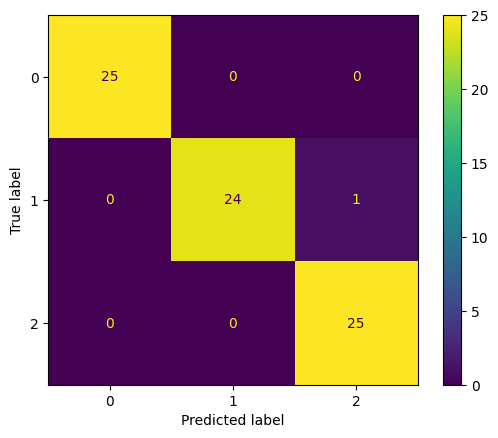

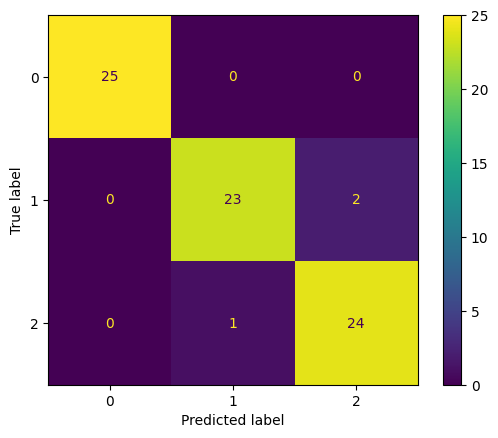

In [208]:
with start_iteration(iteration_name="Logit with SHAP plot") as iteration:
    run = ScikitIterationRun(dataset, iris_prep, model_builder, model_params, model_path, iteration)
    run.preprocess()
    run.train_model()
    run.evaluate(average="micro")
    run.log()

    run.get_confusion_matrix_display(set="train")
    save_and_log_current_figure("plots/train_cm.png", iteration)
    
    run.get_confusion_matrix_display(set="test")
    save_and_log_current_figure("plots/test_cm.png", iteration)


**Komentarz:**

### 1.8 Logowanie interaktywnych wykresów z danych (quite hard one, sorry://)

Wytrenuj prostą sieć neuronową z wykorzystaniem bilbioteki [tensorflow](https://keras.io/) lub [pyTorch](https://pytorch.org/). Następnie zaloguj jak zmieniał się błąd modelu podczas końca każdej z epok na zbiorze treningowym / walidacyjnym. Dodaj 2-3 iteracje dla trenowanych sieci z różnymi hiperparametrami (tak żeby wyniki metryk na zbiorze testowym się różniły). **Podczas logowania iteracji zaloguj informacje o wcześniej zalogowanych błędach z epok z wykorzystaniem funkcji `log_chart`**.

Po pomyślnym dodaniu iteracji, wyświetl wykresy na stronie webowej oraz porównaj iteracje między sobą za pomocą opcji compare.

**Hint:**
```python
iteration.log_chart(
        chart_name=..., chart_type=...,
        x_data=...,
        y_data=...,
        y_data_names=...,
        x_label=..., y_label=..., 
        chart_title=...,
        comparable=True)
```

**Hint 2:**
W razie dalszych problemów odsyłam do notebooka `library/tests/notebooks/mlops-ai-library-showcase.ipynb`, sekcja **Creating iterations with Interactive Charts**.

In [214]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [228]:
exp = create_experiment("NN Experiment")

In [229]:
set_active_experiment(exp["id"])

'Active experiment set to: 657b835dd660d369e83e6b02'

In [234]:
class NNModel(torch.nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)
    
    def predict(self, df):
        v = torch.tensor(df.values, dtype=torch.float32)
        
        self.eval()
        with torch.inference_mode():
            y_logits = self(v)
            y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
        
        return y_pred.tolist()


class TorchIterationRun(IterationRun):
    def train_model(self, epochs, batch_size=32, n_units=10, lr=0.01):
        X_train = self.prep_dataset["train"][0]
        X_test = self.prep_dataset["test"][0]

        y_train = self.prep_dataset["train"][1]
        y_test = self.prep_dataset["test"][1]

        X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.long)
        
        X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test, dtype=torch.long)
        
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
        test_loader = DataLoader(test_dataset, batch_size=batch_size)
        
        model = NNModel(
            input_shape=X_train.shape[1],
            hidden_units=n_units,
            output_shape=pd.Series(y_train).nunique()
        )

        loss_fn = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)

        train_losses, train_accs = [], []
        val_losses, val_accs = [], []
        
        ## Training
        for epoch in range(epochs):
            
            train_loss, train_acc = 0, 0
            
            for batch, (X, y) in enumerate(train_loader):
                model.train() 
                y_pred = model(X)
                
                loss = loss_fn(y_pred, y)
                train_loss += loss
                train_acc += accuracy_score(torch.softmax(y_pred, dim=1).argmax(dim=1), y)
                
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
    
            train_loss /= len(train_loader)
            train_acc /= len(train_loader)
    
            ## Validation
            val_loss, val_acc = 0, 0 
            model.eval()
            with torch.inference_mode():
                for X, y in test_loader:
                    val_pred = model(X)
                    val_loss += loss_fn(val_pred, y)
                    val_acc += accuracy_score(torch.softmax(val_pred, dim=1).argmax(dim=1), y)
    
                val_loss /= len(test_loader)
                val_acc /= len(test_loader)
    
            print(f"Epoch: {epoch} | Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}% | Val loss: {val_loss:.5f}, Val acc: {val_acc:.2f}%")
            train_losses.append(round(train_loss.item(), 3))
            train_accs.append(round(train_acc.item(), 3))
            val_losses.append(round(val_loss.item(), 3))
            val_accs.append(round(val_acc.item(), 3))

        self.model = model
        
        return train_losses, train_accs, val_losses, val_accs


In [225]:
model_builder = None
model_params = dict()
model_path = ""

In [238]:
with start_iteration(iteration_name="NN v1 - 30 epochs") as iteration:
    run = TorchIterationRun(dataset, iris_prep, model_builder, model_params, model_path, iteration, build_model=False)
    run.preprocess()
    train_losses, train_accs, val_losses, val_accs = run.train_model(epochs=30)
    run.evaluate(average="micro")
    run.log()

    iteration.log_chart(
        chart_name="Loss", chart_type="line",
        x_data=[[i for i in range(len(train_losses))]],
        y_data=[train_losses, val_losses],
        y_data_names=['training loss', 'validation loss'],
        x_label="epochs", y_label="Loss", 
        chart_title='Training vs validation loss',
        comparable=True)
    
    iteration.log_chart(
        chart_name="Accuracy", chart_type="line",
        x_data=[[i for i in range(len(train_losses))]],
        y_data=[train_accs, val_accs],
        y_data_names=['training acc', 'validation acc'],
        x_label="epochs", y_label="Loss", 
        chart_title='Training vs validation accuracy',
        comparable=True)

Epoch: 0 | Train loss: 1.35199 | Train acc: 0.32% | Val loss: 1.14597, Val acc: 0.33%
Epoch: 1 | Train loss: 1.11078 | Train acc: 0.52% | Val loss: 1.01979, Val acc: 0.68%
Epoch: 2 | Train loss: 1.01410 | Train acc: 0.66% | Val loss: 0.96201, Val acc: 0.69%
Epoch: 3 | Train loss: 0.96713 | Train acc: 0.62% | Val loss: 0.94441, Val acc: 0.69%
Epoch: 4 | Train loss: 0.92736 | Train acc: 0.65% | Val loss: 0.92818, Val acc: 0.38%
Epoch: 5 | Train loss: 0.91338 | Train acc: 0.38% | Val loss: 0.89984, Val acc: 0.39%
Epoch: 6 | Train loss: 0.88932 | Train acc: 0.39% | Val loss: 0.85920, Val acc: 0.56%
Epoch: 7 | Train loss: 0.84073 | Train acc: 0.73% | Val loss: 0.80424, Val acc: 0.86%
Epoch: 8 | Train loss: 0.77944 | Train acc: 0.79% | Val loss: 0.75143, Val acc: 0.77%
Epoch: 9 | Train loss: 0.75146 | Train acc: 0.66% | Val loss: 0.70695, Val acc: 0.73%
Epoch: 10 | Train loss: 0.70679 | Train acc: 0.69% | Val loss: 0.66941, Val acc: 0.74%
Epoch: 11 | Train loss: 0.64517 | Train acc: 0.71% | 

**Komentarz:**
Z tego, co rozumiem na razie biblioteka nie oferuje takiej funkcji, ale byłoby bardzo przydatne gdyby tego typu wykresy można było budować "kumulatywnie" - np. w kontekście sieci w każdej epoce dodawać kolejne wartości funkcji celu do tego samego wykresu i w ten sposób budować wykres punkt po punkcie w trakcie trenowania. Dzięki temu dłuższe procedury można monitorować jeszcze przed zakończeniem, a dodatkowo w razie błędu mamy informacje jak szedł trening do momentu przerwania procedury.

## 2. Moduł monitorowania

### 2.1 Dodanie monitorowanego modelu

Wybierz dowolną iteracje z modeli utworzonych z bilblioteki scikit-learn na zbiorze danych Iris, który ma poprawną ścieżkę do pickla na dysku. Następnie, wystaw iteracje na monitorowany model. (wszystko po stronie aplikacji webowej)

**Komentarz:**

### 2.2 Predykcje dla monitorowanego modelu

Wyślij predykcje na wystawiony monitorowany model (np. cały DataFrame X_test ze zbioru Iris) lub pojedyncze, samemu utworzone wiersze.

**Komentarz:**

### 2.3 Niepoprawne predykcje dla monitorowanego modelu

**(Ćwiczenie kreatywne)** Postaraj się popsuć predykcje dla monitorowanego modelu wysyłając zapytania o predykcje w niepoprawnym formacie, z niepoprawnymi typami danych etc. Zbadaj czy biblioteka zwraca poprawne komunikaty dot. błędów.

**Komentarz:**

### (Opcjonalnie) 2.4 Dodanie monitorowanego modelu spoza biliboteki scikit-learn

Jeśli poprawnie wykonałeś zadanie 1.8, możesz wystawić jedną z wytrenowanych tam sieci neuronowych. Chodzi o to żeby model był spoza API scikit-learnowego i nie miał atrybutu `.predict()`. Następnie, skorzystaj z przykładowego wrappera, który znajduje się wew. `server/app/models/monitored_model_wrapper.py`, nadpisz go swoim kodem oraz zapisz pickla z tej klasy jako ścieżka do modelu iteracji. Dzięki temu wrapperowi twój customowy model będzie miał atrybut `.predict()` będzie mógł być poprawnie wystawiony do monitorowania.

**Komentarz:**

## 3. Alerty mailowe

### (Opcjonalnie) 3.1 Załóż konto na platformie [Mailgun](https://www.mailgun.com/).

W celu poprawnego skonfigurowania modułu dot. wysyłania altertów mailowych założ konto na platformie [Mailgun](https://www.mailgun.com/) w celu poprawnego skonfigurowania API keya oraz nazwy domeny (patrz `library/tests/notebooks/06-email-alerts.ipynb`). Jeśli jednak nie chcesz tworzyć swojego konta, skontaktuj się z nami i podaj nam swój adres e-mail, a my podamy Ci nasz klucz API i nazwę domeny. :)

**Komentarz:**

### 3.2 Alert e-mail w przypadku dodania (nie)prawidłowej iteracji.

Dodaj dowolną iteracje (możesz wykorzystać jakąś z utworzonych wcześniej), tym razem jednak ustaw opcję dot. wysyłania e-maili na `True`. Dodaj dwa typy iteracji, jedną prawidłową i drugą nieprawidłową, tak aby otrzymać oba komunikaty błędów.

**Komentarz:**

### 3.3 Alert e-mail w przypadku (nie)poprawnych predykcji monitorowanego modelu.

Podobnie jak wyżej, tym razem jednak alerty mailowe dot. wysyłania predykcji na monitorowany model. Dla poprawnej oraz niepoprawnej predykcji, tak aby otrzymać oba komunikaty błędów.

**Komentarz:**

## Ogólne uwagi

 - `json2html` 👈 tej biblioteki nie było po zainstalowaniu `mlops-ai` i poleciał error przy pierwszym imporcie
 - w słownikach zwracanych przez funkcje widziałbym klucz `id` zamiast `_id` dla spójności (ewentualnie w drugą stronę, ale bez `_` się wydaje ładniej)
 - dosyć ciężko się czyta docsy na github wiki przy obecnym formatowaniu, ale zdaje się, że już pracujecie nad innym formatem
 - \[już nie koniecznie TODO, ale 'nice to have'\] na początku myślałem, że web się będzie odświeżał sam wraz ze zmianami z poziomu biblioteki (np. że utworzony w notebooku projekt od razu pojawi się na liście na stronie), ale zorientowałem się, że trzeba odświeżyć w przeglądarce żeby wczytać zmiany.